# Experiments in extracting the layout of the pdf to determine similarity

In [2]:
from pdfminer.layout import LAParams, LTTextBox
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.converter import PDFPageAggregator
import glob
import os

In [3]:
os.getcwd()

'/home/becode/dr-robin/doccluster'

In [4]:
filelist = glob.glob("/home/becode/dr-robin/kleister-charity/documents/*.pdf")
print(filelist)


['/home/becode/dr-robin/kleister-charity/documents/511c29acc44700cb2f91b615007a46e1.pdf', '/home/becode/dr-robin/kleister-charity/documents/691ac7bf3a306750d7575be487f2a2bc.pdf', '/home/becode/dr-robin/kleister-charity/documents/9ae09d2d1e21cf05ad6cd3afb300cf48.pdf', '/home/becode/dr-robin/kleister-charity/documents/5052732f08dd28552bff24f1915ed422.pdf', '/home/becode/dr-robin/kleister-charity/documents/1d1df29618c9540a6d6f026a463d94c9.pdf', '/home/becode/dr-robin/kleister-charity/documents/c2c4c95526636e8368745d412091826a.pdf', '/home/becode/dr-robin/kleister-charity/documents/6f09da7715347d9d53b90e4915b44592.pdf', '/home/becode/dr-robin/kleister-charity/documents/13a56ff6f6a4cae59588e0134ff7a310.pdf', '/home/becode/dr-robin/kleister-charity/documents/92bc35e9b57507bef0610cda87a097c0.pdf', '/home/becode/dr-robin/kleister-charity/documents/a3a297e9232534418f8a4801231d6b80.pdf', '/home/becode/dr-robin/kleister-charity/documents/68f051458160813b409d44ab6290592f.pdf', '/home/becode/dr-rob

In [5]:
len(filelist)

3414

# first attempts using pdfminer

In [6]:
def pdflayout(file):
    fp = open(file, 'rb')
    rsrcmgr = PDFResourceManager()
    laparams = LAParams()
    device = PDFPageAggregator(rsrcmgr, laparams=laparams)
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    pages = PDFPage.get_pages(fp)
    interpreter.process_page(pages)
    layout = device.get_result()
    #dic = {'x':[],'y':[],'text':[]}
    #for page in pages[1]:
     #   for lobj in layout:
      #      if isinstance(lobj, LTTextBox):
       #         x, y, text = lobj.bbox[0], lobj.bbox[3], lobj.get_text()
        #        dic['x'].append(x)
         #       dic['y'].append(y)
          #      dic['text'].append(text)

    for page in pages:
        print('Processing next page...')
        interpreter.process_page(pages)
        layout = device.get_result()
        for lobj in layout:
            if isinstance(lobj, LTTextBox):
                x, y, text = lobj.bbox[0], lobj.bbox[3], lobj.get_text()
                
                print('At %r is text: %s' % ((x, y), text))
                


In [9]:
fp = open(file, 'rb')
rsrcmgr = PDFResourceManager()
laparams = LAParams()
device = PDFPageAggregator(rsrcmgr, laparams=laparams)
interpreter = PDFPageInterpreter(rsrcmgr, device)
pages = PDFPage.get_pages(fp)

first = next(pages)

interpreter.process_page(first)
        
#Get layout
layout = device.get_result()
dic = {'x0':[],'x1':[],'y0':[],'y1':[],'height':[],'width':[],'txt':[]}
#print('LAParams options available:', dir(laparams))
print(dir(layout))
print(layout.height)
print(layout.width)
bb = []

#Loop through items in layout
lttextbox = 0
ltfigure = 0
lttline = 0
ltrect = 0
ltimage = 0


#print(dir(layout.group_objects))

#print(dir(layout.group_textboxes))
    
#print(dir(layout.groups))

#print(layout.group_objects.__subclasshook__)
#print(layout.group_textboxes.__subclasshook__)
#print(layout.groups.__subclasshook__)


for lobj in layout:
            
    #Check for text boxes
    try:
        if isinstance(lobj, LTTextBox):
            lttextbox +=1
        #For every textbox get the bbox coordinates and text
            x0, x1, y0, y1, txt = lobj.bbox[0], lobj.bbox[1], lobj.bbox[2], lobj.bbox[3], lobj.get_text()
            bb.append(lobj.bbox)
            #Make a dictionary
            dic['x0'].append(x0)
            dic['x1'].append(x1)
            dic['y0'].append(y0)
            dic['y1'].append(y1)
            dic['width'].append(x1-x0)
            dic['height'].append(y1-y0)
            print(dic)
            print(bb)

    except:
        continue
    
    try:
        if isinstance(lobj, LTTextBox):
            ltfigure +=1
    except:
        continue
    try:
        if isinstance(lobj, LTFigure):
            lttline +=1
    except:
        continue
    
    try:
        if isinstance(lobj, LTTLine):
            ltrect +=1
    except:
        continue
    
    try:
        if isinstance(lobj, LTRect):
            ltimage +=1
    except:
        continue
      
#print(lttextbox, ltfigure, lttline, ltrect,ltimage)


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_objs', 'add', 'analyze', 'bbox', 'extend', 'group_objects', 'group_textboxes', 'group_textlines', 'groups', 'hdistance', 'height', 'hoverlap', 'is_empty', 'is_hoverlap', 'is_voverlap', 'pageid', 'rotate', 'set_bbox', 'vdistance', 'voverlap', 'width', 'x0', 'x1', 'y0', 'y1']
841.68
595.2
{'x0': [187.44], 'x1': [565.4504999999999], 'y0': [401.98199999999997], 'y1': [584.827], 'height': [182.84500000000003], 'width': [378.0104999999999], 'txt': []}
[(187.44, 565.4504999999999, 401.98199999999997, 584.827)]
{'x0': [187.44, 137.28], 'x1': [565.4504999999999, 455.2575], 'y0': [401.98199999999997, 453.6325], 'y1': [584.827, 473.2

In [10]:
dic.get("x0")[0]


187.44

# Attempt to convert layout coordinates to shapely bbox

In [11]:
from shapely.geometry import box

x0 = int(dic.get("x0")[0])
y0 = int(dic.get("y0")[0])
x1 = int(dic.get("x1")[0])
y1 = int(dic.get("y1")[0])

b = box(x0, y0, x1, y1)

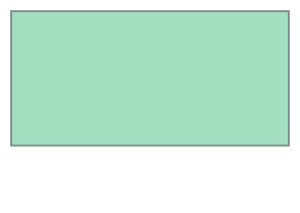

In [12]:
b

In [13]:
list(range(0,len(dic['x0'])))

[0, 1, 2]

# Plotting one bbox from pdf

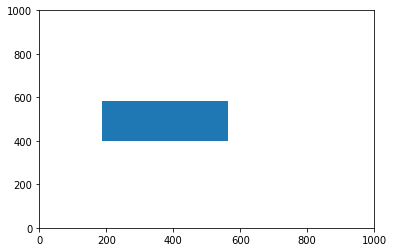

NameError: name 'rect' is not defined

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

def bboxplot(data):
    # Create figure and axes
    x = int(dic.get("x0")[0])
    y = int(dic.get("y0")[0])
    w = int(dic.get("width")[0])
    h = int(dic.get("height")[0])

    fig = plt.figure()
    ax = fig.add_subplot()
    ax.set_xlim((0,1000))
    ax.set_ylim((0,1000))
    # Create a Rectangle patch
    for a in data:
        ax.add_patch(patches.Rectangle((data.x,data.y),data.w,data.h))
    # Add the patch to the Axes


plt.show()
print(rect)
print(type(h))

# Plotting to bboxes for pdf layout

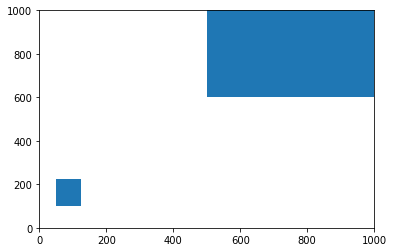

In [180]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

data = [50, 100, 75, 125]

fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlim((0,1000))
ax.set_ylim((0,1000))
    # Create a Rectangle patch
#for a in data:
ax.add_patch(patches.Rectangle((data[0],data[1]),data[2],data[3]))
ax.add_patch(patches.Rectangle((500,600),800,805))
    # Add the patch to the Axes

plt.show()


In [15]:
from pdfminer.pdfparser import PDFParser
from pdfminer.pdfdocument import PDFDocument

# Open a PDF document.
fp = open(file, 'rb')
parser = PDFParser(fp)
document = PDFDocument(parser)

# Get the outlines of the document.
outlines = document.get_outlines()
for (level,title,dest,a,se) in outlines:
    print (level, title)

PDFNoOutlines: 

In [67]:
from pdfminer.layout import LAParams, LTTextBox
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.converter import PDFPageAggregator
import glob

def textcoord(file):
    fp = open(file, 'rb')
    rsrcmgr = PDFResourceManager()
    laparams = LAParams()
    device = PDFPageAggregator(rsrcmgr, laparams=laparams)
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    pages = PDFPage.get_pages(fp)
    
    #Make an empty dictionary
    dic = {'x':[],'y':[],'text':[]}
    
    for page in pages:
        print('Processing next page...')
        interpreter.process_page(page)
        
        #Get layout
        layout = device.get_result()
        
        #Loop through items in layout
        for lobj in layout:
            
            #Check for text boxes
            if isinstance(lobj, LTTextBox):
                
                #For every textbox get the bbox coordinates and text
                #x0, x1, y0, y1 = lobj.bbox[0], lobj.bbox[1],lobj.bbox[2],lobj.bbox[3]
                lobj.bbox
                #lobj.get_text()
                print('At %r is text: %s' % ((x, y), text))
                
                #Make a dictionary
                dic['x'].append(x)
                dic['y'].append(y)
                dic['x'].append(x)
                dic['y'].append(y)
                
                dic['text'].append(text)

#Get list of pdfs in documents folder
filelist = glob.glob("/home/becode/dr-robin/kleister-charity/documents/*.pdf")
#print(filelist)

for f in filelist:
    #get coordinates
    textcoord(file)

Processing next page...
At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

Processing next page...
At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

Processing next page...
At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

Processing next page...
At (291.12, 47.6135) is 

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

Processing next page...
At (291.12, 47.6135) is 

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

Processing next page...
At (291.12, 47.6135) is 

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

Processing next page...
At (291.12, 47.6135) is 

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

Processing next page...
At (291.12, 47.6135) is 

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

Processing next page...
At (291.12, 47.6135) is 

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

Processing next page...
At (291.12, 47.6135) is 

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

Processing next page...
At (291.12, 47.6135) is 

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

Processing next page...
At (291.12, 47.6135) is 

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

Processing next page...
At (291.12, 47.6135) is 

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

Processing next page...
At (291.12, 47.6135) is 

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

Processing next page...
At (291.12, 47.6135) is 

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

Processing next page...
At (291.12, 47.6135) is 

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

Processing next page...
At (291.12, 47.6135) is 

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

Processing next page...
At (291.12, 47.6135) is 

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

Processing next page...
At (291.12, 47.6135) is 

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

Processing next page...
At (291.12, 47.6135) is 

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

Processing next page...
At (291.12, 47.6135) is 

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

Processing next page...
At (291.12, 47.6135) is 

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

Processing next page...
At (291.12, 47.6135) is 

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

Processing next page...
At (291.12, 47.6135) is 

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

At (291.12, 47.6135) is text: t0

Processing next page...
At (291.12, 47.6135) is 

KeyboardInterrupt: 

In [64]:
dir(lobj)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_objs',
 'add',
 'analyze',
 'bbox',
 'extend',
 'group_objects',
 'group_textboxes',
 'group_textlines',
 'groups',
 'hdistance',
 'height',
 'hoverlap',
 'is_empty',
 'is_hoverlap',
 'is_voverlap',
 'matrix',
 'name',
 'set_bbox',
 'vdistance',
 'voverlap',
 'width',
 'x0',
 'x1',
 'y0',
 'y1']

# Attempt to convert pdf to bytes

In [83]:
import base64

with open(file, "rb") as pdf_file:
    base64_string = base64.b64encode(pdf_file.read())

# Converting bytes to pdf

In [91]:
from PIL import Image
import cv2
import io
# Take in base64 string and return cv image
def stringToRGB(base64_string):
    imgdata = base64.b64decode(str(base64_string))
    image = Image.open(io.BytesIO(imgdata))
    print(image)
    return cv2.cvtColor(np.array(image), cv2.COLOR_BGR2RGB)


In [90]:
from PIL import Image
import io

# This portion is part of my test code
byteImg = Image.open(file).tobytes()

# Non test code
dataBytesIO = io.BytesIO(byteImg)
Image.open(dataBytesIO) # <- Error here

UnidentifiedImageError: cannot identify image file '/home/becode/dr-robin/kleister-charity/documents/691ac7bf3a306750d7575be487f2a2bc.pdf'

In [92]:
stringToRGB(base64_string)

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7f884077b540>

In [94]:
from pdf2image import convert_from_path, convert_from_bytes
from pdf2image.exceptions import (
    PDFInfoNotInstalledError,
    PDFPageCountError,
    PDFSyntaxError
)

In [119]:
images = convert_from_path(file)
image = images[0]
print(image.format) 
print(image.size) 
print(image.mode)

PPM
(1652, 2290)
RGB


In [118]:
from io import BytesIO
from PIL import Image
dir(s)


['_Image__transformer',
 '__array_interface__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_close_exclusive_fp_after_loading',
 '_copy',
 '_crop',
 '_dump',
 '_ensure_mutable',
 '_exclusive_fp',
 '_exif',
 '_expand',
 '_get_safe_box',
 '_min_frame',
 '_new',
 '_open',
 '_repr_png_',
 '_seek_check',
 '_size',
 '_token',
 'alpha_composite',
 'category',
 'close',
 'convert',
 'copy',
 'crop',
 'custom_mimetype',
 'decoderconfig',
 'decodermaxblock',
 'draft',
 'effect_spread',
 'entropy',
 'filename',
 'filter',
 'format',
 'format_description',
 'fp',
 'frombytes',
 'fromstring',
 'get_forma

In [105]:
from PIL import ImageOps

img = s.convert('L')
img_inverted = ImageOps.invert(img)

np_img = np.array(img_inverted)
np_img[np_img > 0] = 1

In [ ]:
Tfid vectorising - experimenting with parameters
then looked at geopandas
then looking at cv
then maybe go back to text clustering tomorrow

 ...]

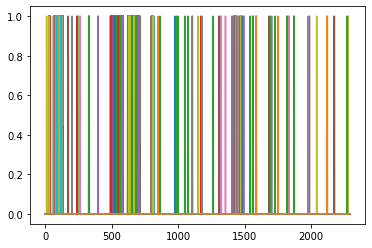

In [110]:
import matplotlib.pyplot as plt
plt.plot(np_img)

In [103]:
import numpy as np
img_arr = np.array(s) 
print(img_arr)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


# Converting image to numpy array

In [113]:
# import the necessary packages
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage.metrics import mean_squared_error

#from skimage import data, img_as_float


In [114]:
from skimage.util import img_as_float
image = img_as_float(func1(func2(file)))

NameError: name 'func1' is not defined

In [80]:
filelist = glob.glob("/home/becode/dr-robin/kleister-charity/documents/*.pdf")
file = filelist[1]
file

'/home/becode/dr-robin/kleister-charity/documents/691ac7bf3a306750d7575be487f2a2bc.pdf'

In [62]:
#Get list of pdfs in documents folder
filelist = glob.glob("/home/becode/dr-robin/kleister-charity/documents/*.pdf")
print(filelist)

for f in filelist:
    #get coordinates
    textcoord(file)

Processing next page...
At (187.44, 584.827) is text: PORTSWOOD  CHURCH

At (137.28, 473.2375) is text: TRUSTEES REPORT AND ACCOUNTS

At (153.6, 363.808) is text: FOR YEAR ENDED  31ST MARCH , 2017

Processing next page...
At (180.96, 767.0395) is text: PORTSWOOD CHURCH
Portswood Road,  Southampton SO17 2FY
Charity  Registered  Number  248769

At (68.16, 717.975) is text: Trustees:  D.L.  Gill

At (138.48, 702.3335) is text: M.C. Hollingsworth
P. Lambros
P.M.T. Crozier
L.J. Dodd
M.M.  White

At (68.64, 634.8935) is text: LeqalAdvisors:
Paris  Smith  LLP, Number 1 London Road, Southampton  SO15 2AE

At (68.16, 601.137) is text: Bankers:
CAF Bank Ltd,  25 Kings HillAvenue,  West  Malling, Kent ME19  4JQ

At (113.28, 545.3629999999999) is text: TRUSTEES ANNUAL REPORT FOR  THE YEAR ENDED 31"t MARCH2017

At (68.16, 510.3335) is text: Governinq  Document:

At (68.16, 442.8935) is text: Obiects of the Charitv:

At (67.68, 375.057) is text: Trustees:

At (68.16, 330.8135) is text: Portswood Chu

At (15.36, 698.7959999999999) is text: t\
c)(\a
J-()
E,

At (15.6, 620.5980000000001) is text: (Y)

At (15.36, 639.5055) is text: =U'
o
lUo
z.
UJu
ru

At (15.36, 553.4395000000001) is text: il.oLL

At (14.16, 218.8275) is text: J-oE
=E
C)

At (14.16, 176.69150000000002) is text: ooo

At (14.16, 141.735) is text: =@
F
E,o(L

At (80.4, 682.4240000000001) is text: (o
(>
c{

At (80.4, 630.6675) is text: a
E

At (80.16, 622.935) is text: C;LL
-iB
o
F

At (67.68, 568.9875) is text: E
:9a!q  oE
trE,i
t

At (73.92, 518.337) is text: c
=Oc
FO

At (73.92, 495.7665) is text: .9=e5o)

At (73.92, 474.751) is text: cn

At (67.68, 450.8865) is text: o_>O+=t
o=of 
=Yo)
c 
oO^-
rI4

At (94.8, 430.0275) is text: o

At (73.68, 397.377) is text: E
.Qo
=o()C
(I)=
3LL

At (80.16, 349.8675) is text: 'i5
C
=lJ-
(o
(1)

At (79.92, 312.438) is text: Co(9

At (47.52, 513.7875) is text: a-o
C
3
LL
c)
E

At (49.44, 467.9475) is text: c

At (49.44, 453.24499999999995) is text: (D
(J

At (49.44, 436.03799999999995) 

At (228.24, 801.8395) is text: PORTSWOOD  CHURCH

At (152.88, 775.043) is text: ACGOUNTS FOR THE YEAR  ENDED  31St MARCH,20'17

At (222.48, 748.0065) is text: NOTES  TO THE ACCOUNTS

At (90.0, 724.3299999999999) is text: Accounting Policies:

At (105.36, 712.8935) is text: Basis of Accountinq:  These  accounts  are prepared  on an accruals basis  in accordance  with

At (118.32, 701.53) is text: the  Charities  Act  201'1  and with Charities  SORP.

At (118.32, 678.5735) is text: The  Charity  is a public  benefit  entity

At (104.64, 655.2099999999999) is text: lncominq Resources:

At (118.8, 643.2935) is text: Donations.  legacies  and similar incominq  resources:  These  are included  in the Statement

At (132.48, 632.0135) is text: of Financial  Activities (SOFA)  on receipt.

At (118.32, 610.163) is text: Tax reclaims  on donations  and gifts: These  are included  on the SOFA  in the  same

At (132.24, 597.6935) is text: financial  year  as the  gift to which  they relate.

At (11

# Small function to convert pdf to image

In [38]:
import pdf2image
import numpy as np
import cv2

def pdf2array(file):
    img = pdf2image.convert_from_path(file)
    #img = np.asarray(img[0])
    #edge_img = cv2.Canny(img,10,20)
    return img

In [46]:
import base64

with open(filelist[1], "rb") as pdf_file:
    encoded_string = base64.b64encode(pdf_file.read())
    img = pdf2image.convert_from_bytes(encoded_string)
    

PDFPageCountError: Unable to get page count.
Syntax Warning: May not be a PDF file (continuing anyway)
Syntax Error (128): Command token too long
Syntax Error (256): Command token too long
Syntax Error: Couldn't find trailer dictionary
Syntax Error: Couldn't find trailer dictionary
Syntax Error: Couldn't read xref table


In [44]:
img0 = pdf2array(filelist[0])
img1 = pdf2array(filelist[1])

In [41]:
type(img0)

list

# Small function to hunt duplicates using average hash value

In [40]:

from PIL import Image
import imagehash

def duplicatehunter(img0, img1):
    hash0 = imagehash.average_hash(Image.open(img0)) 
    hash1 = imagehash.average_hash(Image.open(img1)) 
    cutoff = 5

    if hash0 - hash1 < cutoff:
        print('images are similar')
    else:
        print('images are not similar')
duplicatehunter(img0, img1)

AttributeError: 'list' object has no attribute 'read'

In [13]:

#cv2.imshow("Detected Edges", edge_img)

255

In [ ]:
# Attempt to convert pdf --> image --> binary

In [22]:
ret, bw_img = cv2. threshold(img,127,255,cv2.THRESH_BINARY)
cv2.imshow("Binary Image",bw_img)

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('messi5.jpg',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [42]:
from PIL import Image
import io

# This portion is part of my test code
byteImg = Image.open(filelist[1]).tobytes()

# Non test code
dataBytesIO = io.BytesIO(byteImg)
Image.open(dataBytesIO) # <- Error here

UnidentifiedImageError: cannot identify image file '/home/becode/dr-robin/kleister-charity/documents/691ac7bf3a306750d7575be487f2a2bc.pdf'

In [47]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('messi5.jpg',0)
img2 = img.copy()
template = cv2.imread('template.jpg',0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

AttributeError: 'NoneType' object has no attribute 'copy'

In [54]:
'''
from wand.color import Color
from wand.image import Image as Img
with Img(filename=filelist[1], resolution=300) as img:
    img.background_color = Color("white")
    img.alpha_channel = 'remove'
    img.save(filename='test_file.jpg')
'''

PolicyError: attempt to perform an operation not allowed by the security policy `PDF' @ error/constitute.c/IsCoderAuthorized/408

In [76]:
img0 = pdf2image.convert_from_path(filelist[1], dpi=200, output_folder=None,
                  first_page=None, last_page=None, fmt='ppm',
                  jpegopt=None, thread_count=1, userpw=None, 
                  use_cropbox=False, strict=False, transparent=False,
                  single_file=True,
                  poppler_path=None, grayscale=True, size=None,
                  paths_only=True, use_pdftocairo=True, timeout=600)
#output_file='img0.jpg',

In [74]:
import os
os.getcwd()

'/home/becode/dr-robin/doccluster'

In [78]:
import imageio
imageio.imread(img0)

OSError: Cannot understand given URI: ['/tmp/tmpadmp7ons/94887efb-a0f5-4d46-bb28-a38c0c9dfe88.p....

# Attempt to use canny to detect edges in pdf

In [69]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(img0[0],0)
edges = cv2.Canny(img,100,200)


In [71]:
edges

In [67]:
img0[0]

'/tmp/tmpbfaa2eh9/12c371c5-2284-454f-a367-85b08485b0ae.png'

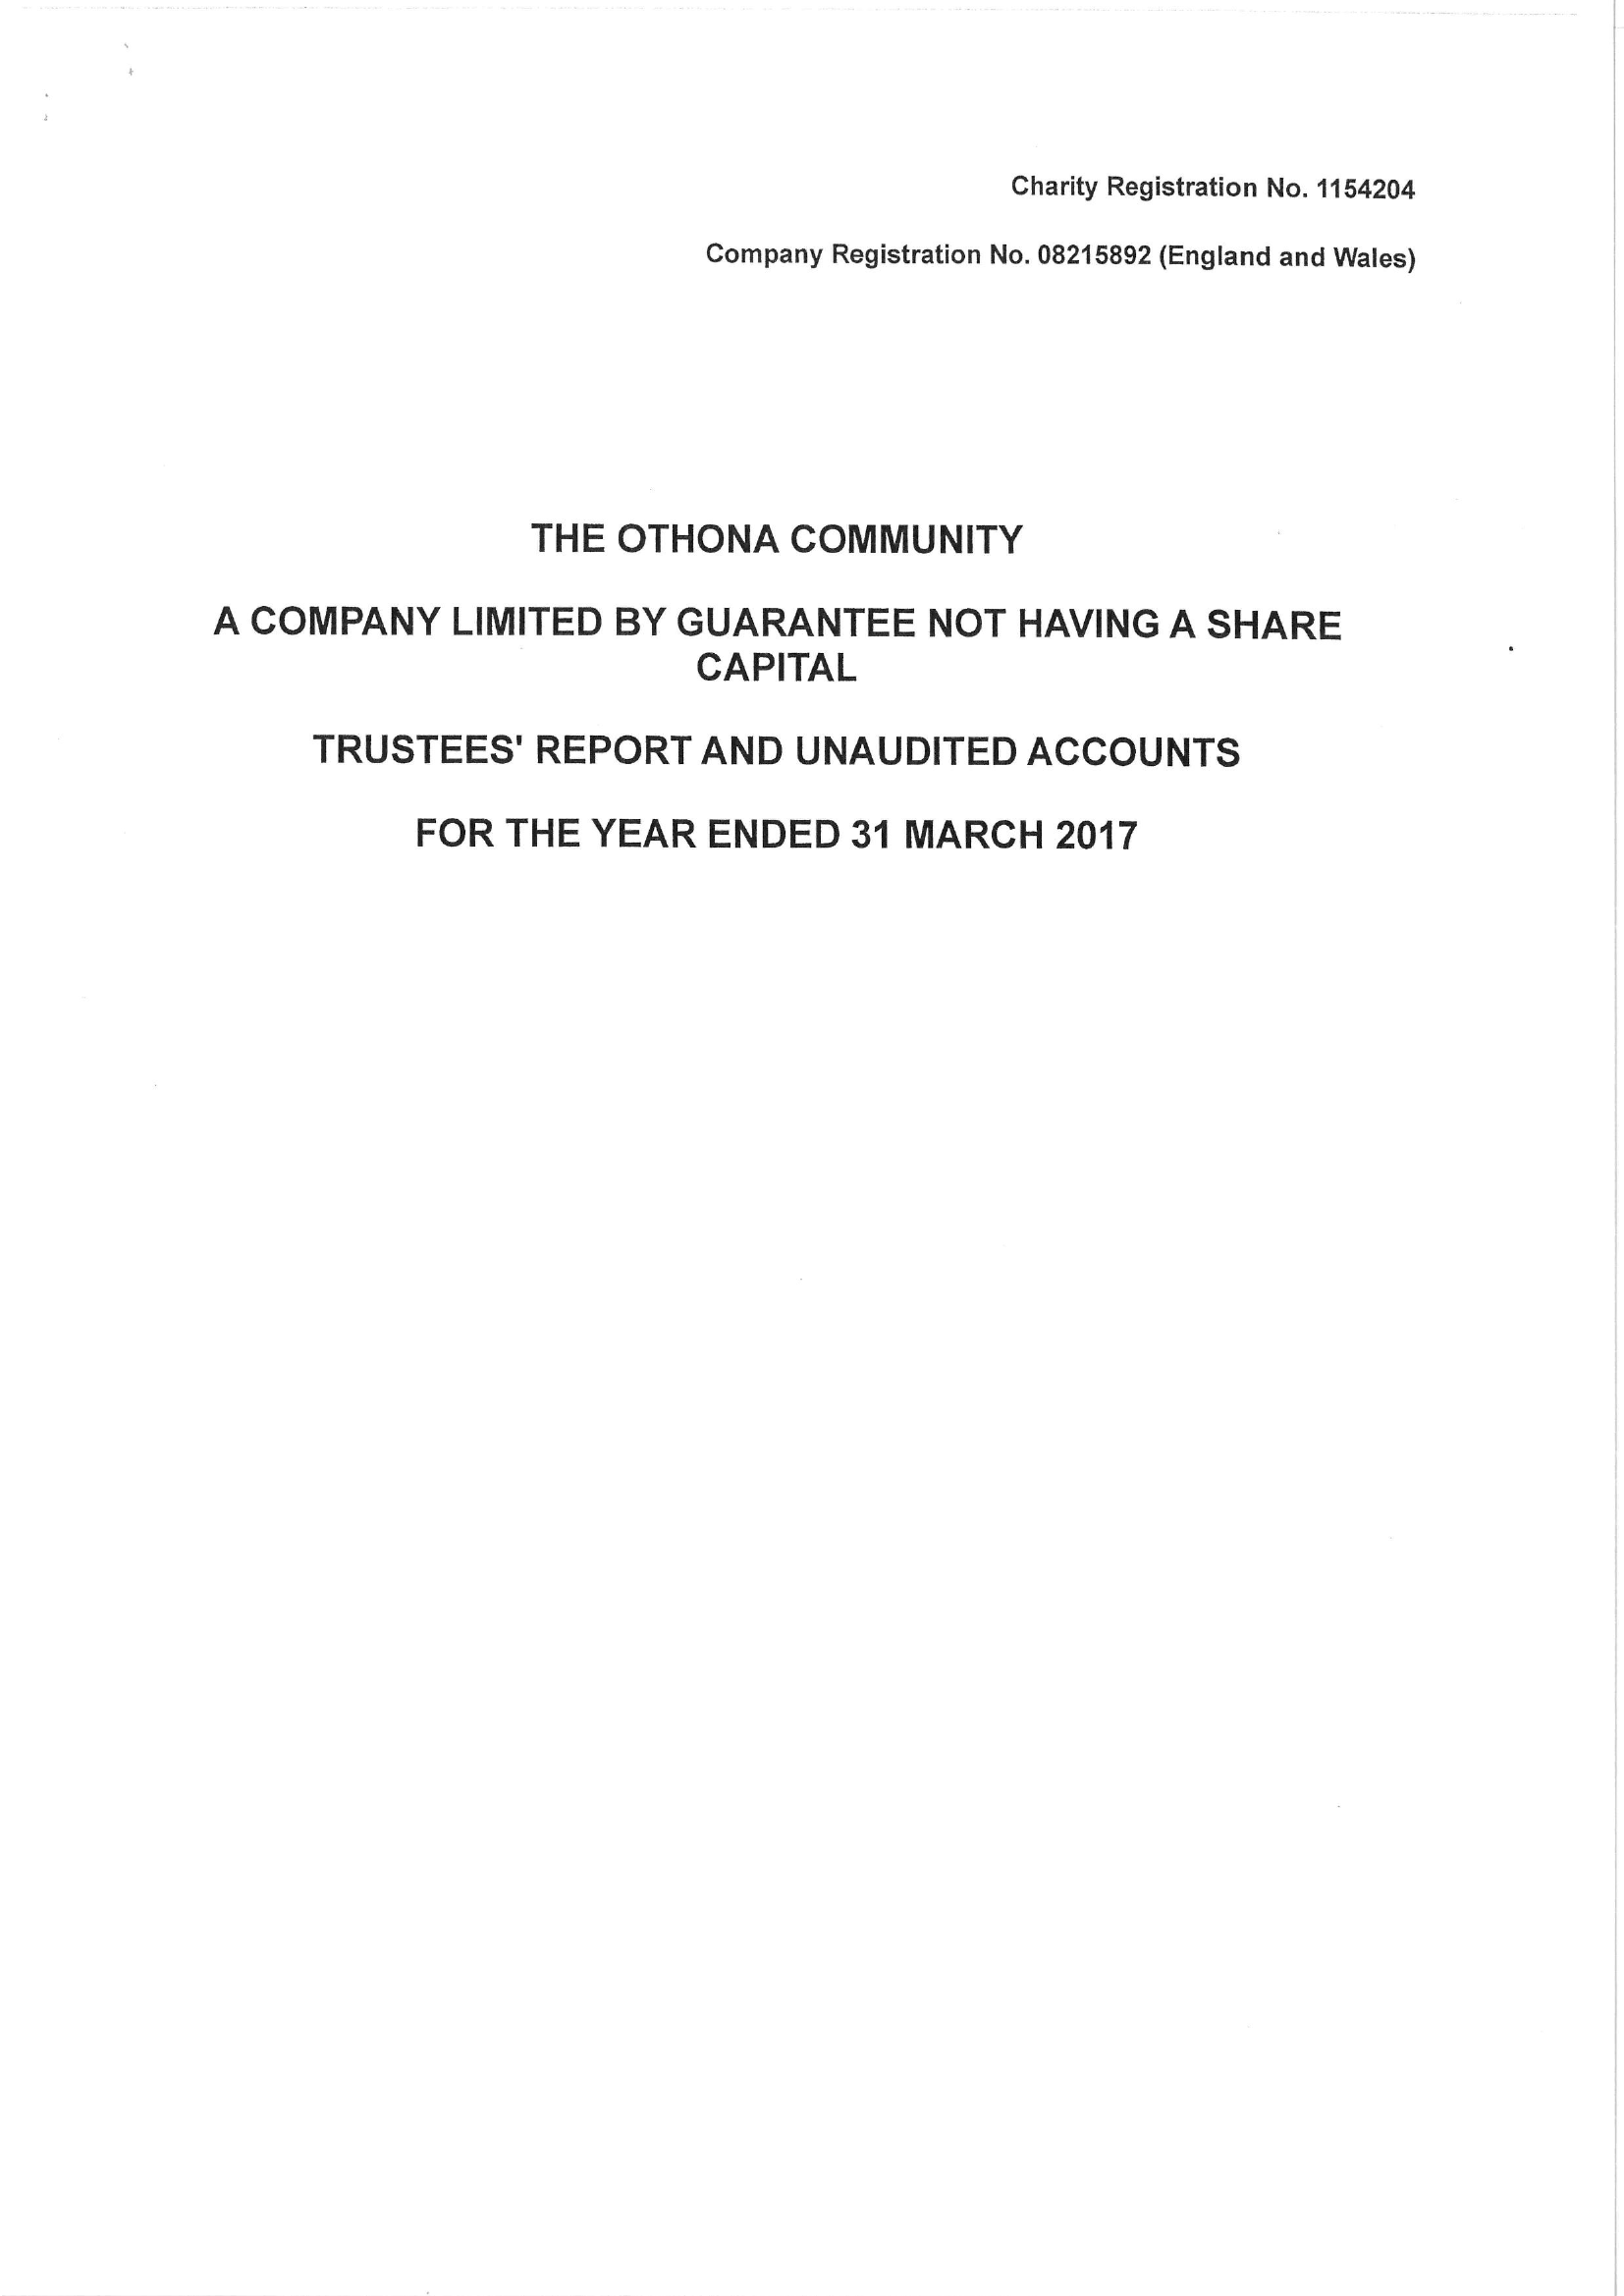

In [58]:
img0[0]

# Finally a way to get layout coordinates from a pdf

In [7]:
import re, subprocess
from shapely.geometry import box
from bs4 import BeautifulSoup

pdf_file = filelist[1]
command  = ['pdftotext', '-bbox-layout', pdf_file, '-']
output   =  subprocess.check_output(command).decode()
soup = BeautifulSoup(output, 'html.parser')
tag = soup.block
xmin=[]
ymin=[]
xmax=[]
ymax=[]
for t in tag:
    tag['xmin']
    #b = box(t['xmin'],t['ymin'],t['xmax'],t['ymax'])


'-bbox-layout'

In [28]:
def other_tool(filename):
    import pdftotext
    data = []
    with open(filename, "rb") as f:
        pdf = pdftotext.PDF(f)  
    for i, page in enumerate(pdf) :
        data.append({'page': i , 'content': page})
    return data

In [29]:
other_tool(pdf_file)

ModuleNotFoundError: No module named 'pdftotext'

In [47]:
import re, subprocess

pdf_file = filelist[1]
output   =  subprocess.check_output(['pdftotext','-f','1', '-bbox', pdf_file,'-']).decode()

In [48]:
output

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd"><html xmlns="http://www.w3.org/1999/xhtml">\n<head>\n<title></title>\n<meta name="Producer" content="iTextSharp 4.1.6 by 1T3XT"/>\n<meta name="CreationDate" content=""/>\n</head>\n<body>\n<doc>\n  <page width="594.720000" height="824.400000">\n    <word xMin="234.960000" yMin="29.521180" xMax="299.369940" yMax="39.007180">REGISTERED</word>\n    <word xMin="303.120000" yMin="29.504670" xMax="350.670000" yMax="38.063670">COMPANY</word>\n    <word xMin="357.840000" yMin="28.690000" xMax="403.400000" yMax="37.690000">NUMBER:</word>\n    <word xMin="408.240000" yMin="28.291960" xMax="447.760000" yMax="37.183960">04257815</word>\n    <word xMin="450.480000" yMin="28.887120" xMax="484.793760" yMax="37.311120">(England</word>\n    <word xMin="492.240000" yMin="28.413000" xMax="505.236000" yMax="36.513000">and</word>\n    <word xMin="510.480000" yMin="27.811010" xMax="537.46

In [49]:
bboxlist = soup.find_all('word')

xmax=[]
xmin=[]
ymax=[]
ymin=[]

for b in bboxlist:
    xmax.append(b.get('xmax'))
    xmin.append(b.get('xmin'))
    ymax.append(b.get('ymax'))
    ymin.append(b.get('ymin'))
   

In [11]:
import re, subprocess
from bs4 import BeautifulSoup

def pdfdim(file):
    command  = ['pdftotext', '-bbox-layout', file, '-']
    #command = ['pdftotext', '-f i', '-l i', '-bbox-layout', file]
    output   =  subprocess.check_output(command).decode()
    soup = BeautifulSoup(output, 'html.parser')
    #block = soup.find_all('block')
    results = soup.find_all("block")
    results   


In [101]:
files = filelist[100:110]


# Very useful to get all bboxes - need to convert to a function

In [129]:
from shapely.geometry import box
import geopandas
import shapely.geometry as geom
import re, subprocess
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import sys

def pdflayout(pdf_file):
    output=""
    output = subprocess.check_output(['pdftotext','-f','1', '-bbox-layout', pdf_file,'-']).decode()
    soup = BeautifulSoup(output, 'html.parser')
    
    block = soup.find_all('word')
    bboxes=[]
    pdfgdf= geopandas.GeoDataFrame()
    for b in block:
        l = box(float(b['xmin']),float(b['ymin']),float(b['xmax']),float(b['ymax']))
        bboxes.append(l)
    gdf = geopandas.GeoDataFrame(geometry=bboxes)
    #gdf.plot()
    polys = gdf.geometry.tolist()
    multi_polygon = geom.MultiPolygon(polys)
    multi_polygon = geopandas.GeoDataFrame(geometry=polys)
    pdfgdf.append(multi_polygon)

In [130]:
for f in files[0:2]:
    pdflayout(pdf_file = f)


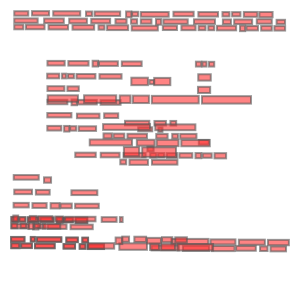

In [136]:
multi_polygon[1:200]

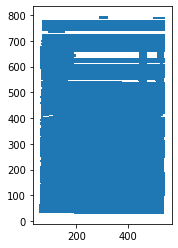

In [256]:
gdf.plot()
plt.show()

# Get the height and width of pdf

In [ ]:
import re, subprocess
from bs4 import BeautifulSoup

def pdfdim(file):
    command  = ['pdftotext', '-bbox-layout', file, '-']
    output   =  subprocess.check_output(command).decode()
    soup = BeautifulSoup(output, 'html.parser')
    dim = soup.find('page')
    height = dim.get('height')
    width = dim.get('width')
    return height, width

# Small function to get all info for a pdf

In [157]:
def pdfinfo(file):
    command  = ['pdfinfo', file]
    output   =  subprocess.check_output(command).decode()
    return output

In [171]:
import json

dic=[]
for f in filelist[0:10]:
    info = pdfinfo(f)
    dic.append(info)
   

In [173]:
dic[1]

'Producer:       iTextSharp 4.1.6 by 1T3XT\nCreationDate:   Thu Oct 16 18:24:03 2014 CEST\nModDate:        Thu Oct 16 18:24:03 2014 CEST\nTagged:         no\nUserProperties: no\nSuspects:       no\nForm:           none\nJavaScript:     no\nPages:          17\nEncrypted:      no\nPage size:      594.72 x 824.4 pts\nPage rot:       0\nFile size:      542288 bytes\nOptimized:      no\nPDF version:    1.4\n'

In [174]:
json_acceptable_string = dic[1].replace("'", "\"")
json.loads(json_acceptable_string)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [154]:
%%time
dims=[]
for f in filelist:
    dim = pdfdim(f)
    print(dim)
    dims.append(dim)

('841.680000', '595.200000')
('824.400000', '594.720000')
('841.680000', '595.200000')
('595.200000', '841.680000')
('595.200000', '841.920000')
('841.680000', '595.440000')
('841.920000', '595.200000')
('841.680000', '595.200000')
('841.800000', '595.200000')
('842.000000', '595.000000')
('842.000000', '595.220000')
('1559.330000', '1101.780000')
('830.880000', '591.360000')
('841.920000', '595.200000')
('841.920000', '595.320000')
('841.920000', '594.960000')
('842.000000', '596.000000')
('841.889800', '595.275600')
('829.440000', '576.000000')
('840.960000', '594.720000')
('841.000000', '595.000000')
('841.680000', '595.080000')
('841.320000', '595.080000')
('842.000000', '595.000000')
('841.920000', '595.200000')
('840.960000', '595.080000')
('841.680000', '595.080000')
('841.440000', '595.200000')
('840.600010', '594.360000')
('841.440000', '595.200000')
('595.320000', '841.920000')
('841.920000', '595.320000')
('792.000000', '612.000000')
('853.228000', '606.614000')
('841.890000

('842.000000', '595.000000')
('540.000000', '720.000000')
('834.840000', '599.040000')
('841.920000', '595.200000')
('841.680000', '595.080000')
('842.400000', '595.440000')
('841.980000', '594.990000')
('841.920000', '595.320000')
('792.000000', '612.000000')
('596.000000', '842.000000')
('840.960000', '595.080000')
('841.890000', '595.276000')
('841.320000', '595.080000')
('841.680000', '595.200000')
('841.680000', '599.040000')
('840.600010', '594.360000')
('833.280000', '593.280000')
('840.960000', '595.080000')
('841.920000', '595.200000')
('842.000000', '595.000000')
('841.890000', '595.276000')
('840.960000', '595.080000')
('841.320000', '595.080000')
('840.960000', '595.080000')
('842.000000', '595.000000')
('841.920000', '595.320000')
('840.960000', '595.080000')
('832.080000', '591.360000')
('841.680000', '596.160000')
('842.000000', '595.000000')
('842.040000', '595.440000')
('842.040000', '595.440000')
('841.890000', '595.270000')
('841.920000', '595.320000')
('842.040000',

('792.000000', '612.000000')
('792.000000', '612.000000')
('840.960000', '595.080000')
('841.320000', '595.080000')
('840.960000', '595.080000')
('842.000000', '595.000000')
('842.000000', '595.000000')
('841.890000', '610.866000')
('842.040000', '595.440000')
('637.276000', '461.528000')
('792.000000', '612.000000')
('841.920000', '595.320000')
('792.000000', '612.000000')
('841.320000', '595.080000')
('841.890000', '595.276000')
('841.800000', '595.200000')
('842.000000', '595.000000')
('841.680000', '595.080000')
('832.560000', '591.360000')
('841.890000', '595.276000')
('840.960000', '595.080000')
('835.200000', '581.760000')
('841.920000', '595.920000')
('841.920000', '595.320000')
('834.960000', '591.360000')
('832.800000', '593.280000')
('841.680000', '595.200000')
('841.000000', '595.000000')
('842.000000', '595.000000')
('841.920000', '595.200000')
('841.886000', '595.273000')
('841.920000', '595.920000')
('841.680000', '595.200000')
('841.800000', '595.400000')
('792.000000',

('841.900024', '595.299988')
('842.040000', '595.440000')
('842.040000', '595.440000')
('842.040000', '596.160000')
('841.920000', '595.200000')
('842.000000', '595.000000')
('792.000000', '612.000000')
('841.800000', '595.200000')
('842.000000', '595.000000')
('841.680000', '595.080000')
('792.000000', '612.000000')
('834.240000', '593.280000')
('840.960000', '596.160000')
('842.000000', '595.000000')
('842.040000', '596.160000')
('841.920000', '595.200000')
('841.920000', '595.320000')
('842.000000', '596.000000')
('841.920000', '595.320000')
('841.920000', '595.320000')
('841.890000', '595.276000')
('842.400000', '595.440000')
('841.890000', '595.276000')
('841.680000', '595.440000')
('841.680000', '595.080000')
('841.680000', '595.200000')
('841.920000', '594.960000')
('842.040000', '596.160000')
('842.040000', '595.440000')
('612.000000', '842.000000')
('841.920000', '595.320000')
('842.000000', '595.000000')
('842.040000', '595.440000')
('841.920000', '595.320000')
('841.920000',

('848.160000', '590.040000')
('841.920000', '595.320000')
('596.000000', '842.000000')
('841.320000', '595.080000')
('840.960000', '595.080000')
('841.920000', '595.320000')
('840.240000', '589.680000')
('840.960000', '595.080000')
('841.320000', '595.080000')
('841.680000', '595.080000')
('840.960000', '596.160000')
('841.920000', '595.200000')
('842.640000', '596.880000')
('792.000000', '612.000000')
('792.000000', '612.000000')
('842.000000', '595.000000')
('842.000000', '595.000000')
('841.920000', '595.200000')
('841.890000', '595.276000')
('841.920000', '595.200000')
('842.000000', '595.000000')
('841.920000', '595.320000')
('841.920000', '595.320000')
('841.890000', '595.280000')
('842.040000', '595.440000')
('841.920040', '595.320010')
('840.960000', '595.080000')
('841.320000', '611.640000')
('792.000000', '612.000000')
('834.480000', '593.280000')
('841.890000', '1190.550000')
('792.000000', '612.000000')
('844.800000', '591.360000')
('842.000000', '595.000000')
('841.920000'

('841.920000', '595.200000')
('842.040000', '595.080000')
('836.160000', '600.960000')
('841.920000', '595.320000')
('842.250000', '597.750000')
('841.800000', '595.200000')
('842.040000', '595.320000')
('841.680000', '595.200000')
('596.000000', '842.000000')
('842.040000', '595.080000')
('841.920000', '595.320000')
('842.000000', '595.000000')
('841.920000', '595.200000')
('841.800000', '595.400000')
('841.920000', '595.320000')
('841.680000', '595.080000')
('841.920000', '595.320000')
('841.920000', '595.200000')
('834.000000', '591.360000')
('841.320000', '595.080000')
('841.920000', '595.320000')
('841.800000', '595.200000')
('792.000000', '612.000000')
('842.040000', '596.160000')
('841.920000', '595.320000')
('841.886000', '595.273000')
('841.000000', '595.000000')
('792.000000', '612.000000')
('841.970000', '595.310000')
('841.680000', '595.440000')
('841.920000', '595.320000')
('842.000000', '595.000000')
('841.920000', '595.200000')
('840.960000', '597.120000')
('841.000000',

('834.000000', '593.280000')
('844.000000', '599.000000')
('841.890000', '595.276000')
('841.680000', '595.200000')
('842.000000', '595.000000')
('841.800000', '595.200000')
('842.000000', '595.220000')
('840.960000', '595.080000')
('792.000000', '612.000000')
('842.040000', '595.320000')
('842.000000', '595.000000')
('841.889740', '595.275581')
('833.760000', '593.280000')
('841.886000', '595.273000')
('841.920000', '595.320000')
('792.000000', '612.000000')
('831.360000', '593.280000')
('841.920000', '595.200000')
('841.920000', '595.320000')
('833.280000', '593.280000')
('841.800000', '595.400000')
('841.920000', '595.320000')
('2338.000000', '1653.000000')
('841.920000', '595.320000')
('831.840000', '591.360000')
('842.040000', '595.320000')
('840.960000', '595.080000')
('840.960000', '596.160000')
('841.919980', '595.320010')
('595.200000', '841.679990')
('841.890000', '595.276000')
('835.200000', '591.360000')
('840.960000', '595.080000')
('841.680000', '595.200000')
('841.680000

KeyboardInterrupt: 

In [150]:
dataset. The algorithm should be optimized for datasets 50-1000 documents, where specific “templates” can
occur between 2-500 times.

3414

In [113]:
o = parser.feed(output)

In [115]:
from bs4 import BeautifulSoup

l = soup.find('div', {'class':'text'}).findChildren()

NameError: name 'soup' is not defined

In [290]:
'''
Random annotation leads to
- Inconsistent annotation
- Slow annotation

• Goal is to speed up annotation so that similar documents are handled by same person which speeds up short term memory retention and
improves consistency

• We’ll rather have 100% automation on 90% of the documents than 80% automation on 95% of the documents. That means we want to ignore
outliers as they provide less value.

So the goal is
• Automatically detect clusters of documents that are very similar. For large clusters, we want to limit the annotation to e.g. 20 docs until the
model recognizes them correctly.
• Find outliers of documents that don’t look like anything else (so we can ignore them)
• Flag duplicates or near duplicates (e.g. different scan of same document might have some other OCR artifacts, but we essentially the same) for
removal because they can make the results on the test set over-optimistc.
• For any given document, be able to query the top n most similar documents. This can be useful for finding how similar documents were
annotated in the past to improve consistency.

• Techniques
My first try would be a simple tf-idf based clustering. That should work well enough, but more advanced methods like document embeddings are
possible too. Rather than optimizing the document embedding part, I would personally spend more time on tuning the clustering so that it
automatically detects reasonable clusters. You need good cut-offs to decide what is an outlier, which documents are similar,
'''

'\nRandom annotation leads to\n- Inconsistent annotation\n- Slow annotation\n\n• Goal is to speed up annotation so that similar documents are handled by same person which speeds up short term memory retention and\nimproves consistency\n\n• We’ll rather have 100% automation on 90% of the documents than 80% automation on 95% of the documents. That means we want to ignore\noutliers as they provide less value.\n\nSo the goal is\n• Automatically detect clusters of documents that are very similar. For large clusters, we want to limit the annotation to e.g. 20 docs until the\nmodel recognizes them correctly.\n• Find outliers of documents that don’t look like anything else (so we can ignore them)\n• Flag duplicates or near duplicates (e.g. different scan of same document might have some other OCR artifacts, but we essentially the same) for\nremoval because they can make the results on the test set over-optimistc.\n• For any given document, be able to query the top n most similar documents. Thi

In [137]:
import cv2

In [143]:
pdffile = files[3]
pdffile

'/home/becode/dr-robin/kleister-charity/documents/3f9bfa8fdef67e6e5efef8eef67f009b.pdf'

In [148]:
os.getcwd()

'/home/becode/dr-robin/doccluster'

In [ ]:
subprocess.run(['pdftocairo','-f','1', '-l','1','-mono','-png', pdffile])


In [141]:
output

CompletedProcess(args=['pdftotext', '-singlefile', '-png', '-mono', '/home/becode/dr-robin/kleister-charity/documents/6b490d4f28b854d071d930ba300f23a1.pdf', '-'], returncode=99)

In [ ]:
img = cv2.imread('3f9bfa8fdef67e6e5efef8eef67f009b-01.png',2)
ret, bw_img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
cv2.imshow("Binary Image",bw_img)
cv2.waitKey(0)
cv2.destroyAllWindows()